In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt

# Please ignore this messy notebook while I clean it up

In [3]:
snps = pd.read_csv('../output/hyprcoloc_results/ForColoc/snpscores.txt.gz', sep='\t')
hyprcoloc = pd.read_csv('../output/hyprcoloc_results/ForColoc/hyprcoloc.results.txt.gz', sep='\t')
colocalized = pd.read_csv('../output/hyprcoloc_results/ForColoc/hyprcoloc.results.OnlyColocalized.Stats.txt.gz', sep='\t')

In [27]:
snps.shape

(69624, 4)

In [28]:
hyprcoloc.shape

(23554, 8)

In [29]:
colocalized.shape

(21883, 10)

In [34]:
len(colocalized.snp.unique())

4645

In [35]:
snps

,snp,ColocalizedCluster,FinemapPr,Locus
0,1:97908656:C:T,1,0.974771,ENSG00000188641.14
1,9:37560759:G:C,1,0.140782,ENSG00000147912.13
2,9:37561120:C:T,1,0.140782,ENSG00000147912.13
3,9:37561993:C:T,1,0.140782,ENSG00000147912.13
4,9:37565725:A:G,1,0.140782,ENSG00000147912.13
...,...,...,...,...
69619,6:33124947:C:A,1,0.005937,ENSG00000112473.18
69620,6:33125047:C:T,1,0.005937,ENSG00000112473.18
69621,6:33125185:G:T,1,0.005937,ENSG00000112473.18
69622,6:33125523:A:G,1,0.005937,ENSG00000112473.18


In [44]:
len([x for x in colocalized.snp.unique() if x in list(snps.snp)])

4189

In [45]:
4645-4189

456

In [6]:
splicing_coloc_idx = colocalized.loc[[y == 'polyA.Splicing.Subset_YRI' for y in [x.split(';')[0] for x in colocalized.phenotype_full]]].index

In [15]:
def get_intron_SJ(intron):
    intron_ = intron.split(';')[1]
    chrom, start, end, cluster = intron_.split(':')
    strand = cluster.split('_')[-1]
    
    if strand == '+':
        ss5 = (int(start)-2, int(start)+6)
        ss3 = (int(end)-7, int(end)+1)
        
    else:
        ss5 = (int(end)-7, int(end)+1)
        ss3 = (int(start)-2, int(start)+6)
        
    return chrom, strand, ss5, ss3


def get_SJ_bed(intron_list):
    
    fh_5ss = open('../../hyprcoloc_5ss.bed', 'w')
    fh_3ss = open('../../hyprcoloc_3ss.bed', 'w')
    
    for intron in intron_list:
        
        chrom, strand, ss5, ss3 = get_intron_SJ(intron)
        
        ss5_row = '\t'.join(['chr' + chrom, str(ss5[0]), str(ss5[1]), intron, '.', strand]) + '\n'
        ss3_row = '\t'.join(['chr' + chrom, str(ss3[0]), str(ss3[1]), intron, '.', strand]) + '\n'
        
        fh_5ss.write(ss5_row)
        fh_3ss.write(ss3_row)
    
        
    

In [16]:
get_SJ_bed(list(colocalized.loc[splicing_coloc_idx].phenotype_full.unique()))

In [17]:
def get_intron_SJ_extended(intron):
    intron_ = intron.split(';')[1]
    chrom, start, end, cluster = intron_.split(':')
    strand = cluster.split('_')[-1]
    
    if strand == '+':
        ss5 = (int(start)-22, int(start)+26)
        ss3 = (int(end)-27, int(end)+21)
        
    else:
        ss5 = (int(end)-27, int(end)+21)
        ss3 = (int(start)-22, int(start)+26)
        
    return chrom, strand, ss5, ss3


def get_SJ_bed_extended(intron_list):
    
    fh_5ss = open('../../hyprcoloc_5ss.extended.bed', 'w')
    fh_3ss = open('../../hyprcoloc_3ss.extended.bed', 'w')
    
    for intron in intron_list:
        
        chrom, strand, ss5, ss3 = get_intron_SJ_extended(intron)
        
        ss5_row = '\t'.join(['chr' + chrom, str(ss5[0]), str(ss5[1]), intron, '.', strand]) + '\n'
        ss3_row = '\t'.join(['chr' + chrom, str(ss3[0]), str(ss3[1]), intron, '.', strand]) + '\n'
        
        fh_5ss.write(ss5_row)
        fh_3ss.write(ss3_row)
    
        
    

In [18]:
get_SJ_bed_extended(list(colocalized.loc[splicing_coloc_idx].phenotype_full.unique()))

In [11]:
import sys
from Bio import motifs
from Bio.Seq import Seq
import pandas as pd

# df = pd.read_csv(MyArg1, delimiter="\t", names=['name', 'seq'])
# df['seq'] = df['seq'].apply(Seq)

# m  = motifs.create(df['seq'])
# pwm = m.counts.normalize()
# pssm = pwm.log_odds()

# # pssm.calculate(m.consensus)
# df['score'] = df['seq'].apply(pssm.calculate)

# #df.to_csv(MyArg2, sep='\t', header=False, index=False)

In [19]:
df = pd.read_csv('../../hyprcoloc_5ss.sorted.tab', sep='\t', names=['name', 'seq'])

In [20]:
df = pd.read_csv('../../hyprcoloc_5ss.sorted.tab', sep='\t', names=['name', 'seq'])

df['seq'] = df['seq'].apply(Seq)

m  = motifs.create(df['seq'])
pwm = m.counts.normalize()
pssm = pwm.log_odds()

# pssm.calculate(m.consensus)
df['score'] = df['seq'].apply(pssm.calculate)

In [21]:
pssm.calculate(Seq('GAGTTGGT'))

0.6864564

In [22]:
pwm

{'A': (0.6226315789473684,
  0.08473684210526315,
  0.0010526315789473684,
  0.0005263157894736842,
  0.5536842105263158,
  0.6542105263157895,
  0.08736842105263158,
  0.1636842105263158),
 'C': (0.11473684210526315,
  0.026842105263157896,
  0.0,
  0.010526315789473684,
  0.031578947368421054,
  0.08947368421052632,
  0.053157894736842105,
  0.15),
 'G': (0.12631578947368421,
  0.8163157894736842,
  0.9989473684210526,
  0.0005263157894736842,
  0.3736842105263158,
  0.14894736842105263,
  0.7805263157894737,
  0.1994736842105263),
 'T': (0.13631578947368422,
  0.07210526315789474,
  0.0,
  0.988421052631579,
  0.04105263157894737,
  0.10736842105263159,
  0.07894736842105263,
  0.4868421052631579)}

In [46]:
merged_snps = colocalized.merge(snps, left_on='Locus', right_on='Locus')

splicing_idx = merged_snps.loc[[y == 'polyA.Splicing.Subset_YRI' for y in [x.split(';')[0] for x in merged_snps.phenotype_full]]].index

In [47]:
merged_snps

,snp_x,beta,beta_se,p,Locus,phenotype_full,iteration,ColocPr,RegionalPr,TopSNPFinemapPr,snp_y,ColocalizedCluster,FinemapPr
0,1:169950692:C:T,0.707955,0.109608,1.735140e-08,ENSG00000000457.14,MetabolicLabelled.30min;ENSG00000000457.14,1,0.8375,0.9621,0.4808,1:169950692:C:T,1,0.480820
1,1:169950692:C:T,0.707955,0.109608,1.735140e-08,ENSG00000000457.14,MetabolicLabelled.30min;ENSG00000000457.14,1,0.8375,0.9621,0.4808,1:169951871:ATAAT:A,1,0.480820
2,1:169950692:C:T,0.580269,0.114196,3.588590e-06,ENSG00000000457.14,MetabolicLabelled.60min;ENSG00000000457.14,1,0.8375,0.9621,0.4808,1:169950692:C:T,1,0.480820
3,1:169950692:C:T,0.580269,0.114196,3.588590e-06,ENSG00000000457.14,MetabolicLabelled.60min;ENSG00000000457.14,1,0.8375,0.9621,0.4808,1:169951871:ATAAT:A,1,0.480820
4,1:169692248:T:TA,-0.548874,0.087977,2.952800e-08,ENSG00000000460.17,H3K27AC;H3K27AC_peak_7161,1,0.3770,0.6895,0.2401,1:169692248:T:TA,1,0.240080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321739,11:57646470:C:G,1.013670,0.136558,2.102900e-10,ENSG00000288534.1,H3K27AC;H3K27AC_peak_16841,1,0.9258,0.9997,0.5275,11:57651876:G:T,1,0.472271
321740,11:57646470:C:G,1.058860,0.131536,1.478100e-11,ENSG00000288534.1,H3K27AC;H3K27AC_peak_16842,1,0.9258,0.9997,0.5275,11:57646470:C:G,1,0.527473
321741,11:57646470:C:G,1.058860,0.131536,1.478100e-11,ENSG00000288534.1,H3K27AC;H3K27AC_peak_16842,1,0.9258,0.9997,0.5275,11:57651876:G:T,1,0.472271
321742,11:57646470:C:G,0.770294,0.121887,2.117410e-08,ENSG00000288534.1,H3K4ME3;H3K4ME3_peak_9500,1,0.9258,0.9997,0.5275,11:57646470:C:G,1,0.527473


In [30]:
merged_snps.loc[splicing_idx].head().phenotype_full.loc[66]

'polyA.Splicing.Subset_YRI;7:1936897:1940088:clu_15643_-'

In [48]:
def get_splice_junctions(intron):
    chrom, start, end, clu = intron.split(';')[1].split(':')
    strand = clu.split('_')[-1]
    
    return int(start), int(end), strand


def isSNPinSJ(snp, intron):
    
    snp_pos = int(snp.split(':')[1])
    
    start, end, strand = get_splice_junctions(intron)
    
    token = False
    token = (token or (start+1 == snp_pos))
    token = (token or (start+2 == snp_pos))
    token = (token or (end-1 == snp_pos))
    token = (token or (end-2 == snp_pos))
    
    return token


def isSNPnearSJ(snp, intron, window=5):
    
    snp_pos = int(snp.split(':')[1])
    
    start, end, strand = get_splice_junctions(intron)
    
    token = False
    arange = np.arange(-window, window) + 1
    for pos in arange:
        token = (token or (start+pos == snp_pos))
        token = (token or (end-pos == snp_pos))
    
    return token


def isClusterinSJ(data, snp_x):
    snp_x_data = data.loc[data.snp_x == snp_x]
    
    token = False
    
    snps_sj_pr = []
    snps_no_sj_pr = []
    betas = []
    p = []
    
    for idx in snp_x_data.index:
        intron = snp_x_data.loc[idx, 'phenotype_full']
        snp_y = snp_x_data.loc[idx, 'snp_y']
        locus = snp_x_data.loc[idx, 'Locus']
        
        token_intron = isSNPinSJ(snp_y, intron)
        
        if token_intron:
            
            print(snp_y, intron)
            
            betas.append(snp_x_data.loc[idx, 'beta'])
            p.append(snp_x_data.loc[idx, 'p'])
            snps_sj_pr.append(snps.loc[(snps.snp==snp_y) & (snps.Locus==locus)].FinemapPr)
            
        snps_no_sj_pr.append(snps.loc[(snps.snp==snp_y) & (snps.Locus==locus)].FinemapPr)
        token = (token or token_intron)
        
    return token, betas, p, snps_sj_pr, snps_no_sj_pr
            

merged_splicing = merged_snps.loc[splicing_idx]

snp_sj = []
snp_no_sj = []

beta_snp = []
beta_no_snp = [] 

p_snp = []
p_no_snp = []

pr_sj = []
pr_nosj = []

for snp_x in tqdm(merged_splicing.snp_x.unique(), leave=True, position=0):
    
    CSJ, beta, p, sjp, nsjp = isClusterinSJ(merged_splicing, snp_x)
    
    if CSJ:
        beta_snp.extend(beta)
        p_snp.extend(p)
        snp_sj.append(snp_x)
        pr_sj.extend(list(sjp))
    else:
        beta_no_snp.extend(list(merged_splicing.loc[merged_splicing.snp_x == snp_x].beta))
        p_no_snp.extend(list(merged_splicing.loc[merged_splicing.snp_x == snp_x].p))
        snp_no_sj.append(snp_x)
        pr_nosj.extend(list(nsjp))
    
    

  1%|          | 4/727 [00:00<01:16,  9.42it/s]

2:201141373:G:A polyA.Splicing.Subset_YRI;2:201140439:201141374:clu_6977_+


  1%|▏         | 10/727 [00:01<01:10, 10.24it/s]

19:41586462:A:T polyA.Splicing.Subset_YRI;19:41586195:41586464:clu_38826_+
19:41585872:G:A polyA.Splicing.Subset_YRI;19:41585871:41586154:clu_38826_+
19:41586462:A:T polyA.Splicing.Subset_YRI;19:41585495:41586464:clu_38826_+


  3%|▎         | 20/727 [00:02<01:05, 10.83it/s]

17:51166498:G:A polyA.Splicing.Subset_YRI;17:51166497:51166827:clu_35611_+
17:51166498:G:A polyA.Splicing.Subset_YRI;17:51166497:51166827:clu_35611_+


 13%|█▎        | 91/727 [00:25<02:45,  3.85it/s]

20:18412855:C:T polyA.Splicing.Subset_YRI;20:18412853:18412968:clu_39398_-
20:18412855:C:T polyA.Splicing.Subset_YRI;20:18412853:18414348:clu_39398_-


 13%|█▎        | 95/727 [00:27<02:42,  3.89it/s]

12:112919388:G:A polyA.Splicing.Subset_YRI;12:112917700:112919389:clu_27175_+


 16%|█▌        | 114/727 [00:33<04:43,  2.16it/s]

14:57481662:T:C polyA.Splicing.Subset_YRI;14:57481660:57483065:clu_29270_-


 16%|█▌        | 116/727 [00:34<04:02,  2.52it/s]

14:58456677:G:A polyA.Splicing.Subset_YRI;14:58453473:58456678:clu_28485_+


 21%|██        | 150/727 [00:41<02:51,  3.37it/s]

19:57492212:G:A polyA.Splicing.Subset_YRI;19:57492211:57492856:clu_39240_+


 25%|██▌       | 184/727 [00:54<01:49,  4.94it/s]

12:6872998:C:T polyA.Splicing.Subset_YRI;12:6872997:6873246:clu_25014_-
12:6944654:TGGGTCAGAC:T polyA.Splicing.Subset_YRI;12:6944652:6945771:clu_26282_+


 28%|██▊       | 206/727 [01:04<05:24,  1.61it/s]

2:177332141:C:T polyA.Splicing.Subset_YRI;2:177323396:177332142:clu_5432_-


 31%|███▏      | 229/727 [01:14<03:06,  2.67it/s]

10:97679916:C:G polyA.Splicing.Subset_YRI;10:97679915:97686766:clu_22296_-


 36%|███▌      | 262/727 [01:23<00:47,  9.77it/s]

7:76000956:T:C polyA.Splicing.Subset_YRI;7:76000954:76003758:clu_16010_-


 38%|███▊      | 275/727 [01:25<01:16,  5.91it/s]

8:33513081:C:T polyA.Splicing.Subset_YRI;8:33512712:33513082:clu_17771_-


 42%|████▏     | 304/727 [01:32<01:40,  4.22it/s]

14:91170188:C:T polyA.Splicing.Subset_YRI;14:91170186:91173289:clu_28767_+


 43%|████▎     | 310/727 [01:33<01:08,  6.04it/s]

11:47237713:G:C polyA.Splicing.Subset_YRI;11:47237712:47237837:clu_24015_+


 44%|████▎     | 318/727 [01:34<00:58,  7.05it/s]

13:52143914:CT:C polyA.Splicing.Subset_YRI;13:52141069:52143915:clu_27668_-
13:52143914:CT:C polyA.Splicing.Subset_YRI;13:52136902:52143916:clu_27668_-


 46%|████▌     | 333/727 [01:42<03:15,  2.02it/s]

2:169584491:G:A polyA.Splicing.Subset_YRI;2:169584490:169603642:clu_6756_+


 49%|████▊     | 354/727 [01:48<02:35,  2.40it/s]

16:24929612:C:A polyA.Splicing.Subset_YRI;16:24920260:24929613:clu_31625_-


 51%|█████     | 368/727 [01:50<00:32, 11.09it/s]

19:51417359:C:T polyA.Splicing.Subset_YRI;19:51417358:51417545:clu_37772_-


 51%|█████     | 372/727 [01:50<00:40,  8.74it/s]

1:179889309:G:A polyA.Splicing.Subset_YRI;1:179884769:179889310:clu_3820_+


 55%|█████▍    | 397/727 [01:56<01:34,  3.49it/s]

20:18161818:A:G polyA.Splicing.Subset_YRI;20:18159265:18161820:clu_39897_+


 57%|█████▋    | 416/727 [01:59<00:53,  5.86it/s]

5:83353124:G:A polyA.Splicing.Subset_YRI;5:83258677:83353125:clu_11805_+


 58%|█████▊    | 422/727 [02:00<00:44,  6.82it/s]

18:11905954:C:T polyA.Splicing.Subset_YRI;18:11905953:11906203:clu_36477_-


 60%|█████▉    | 433/727 [02:03<01:04,  4.54it/s]

8:123142457:G:T polyA.Splicing.Subset_YRI;8:123142456:123144717:clu_18966_+


 63%|██████▎   | 461/727 [02:08<00:35,  7.50it/s]

17:44708840:G:T polyA.Splicing.Subset_YRI;17:44708839:44709304:clu_35462_+


 68%|██████▊   | 493/727 [02:24<01:42,  2.29it/s]

8:99892049:T:C polyA.Splicing.Subset_YRI;8:99892047:99893639:clu_18038_-


 68%|██████▊   | 495/727 [02:24<01:06,  3.47it/s]

8:94529074:A:G polyA.Splicing.Subset_YRI;8:94527363:94529076:clu_18010_-


 69%|██████▉   | 505/727 [02:26<00:51,  4.32it/s]

17:54999625:G:A polyA.Splicing.Subset_YRI;17:54999451:54999626:clu_35621_+


 73%|███████▎  | 531/727 [02:36<00:29,  6.59it/s]

16:28835545:G:A polyA.Splicing.Subset_YRI;16:28835399:28835546:clu_32670_+


 75%|███████▍  | 542/727 [02:39<00:32,  5.66it/s]

5:131165058:A:C polyA.Splicing.Subset_YRI;5:131162676:131165060:clu_12933_-


 79%|███████▉  | 575/727 [02:48<01:39,  1.53it/s]

8:85219234:A:T polyA.Splicing.Subset_YRI;8:85217502:85219236:clu_17966_-


 82%|████████▏ | 594/727 [02:56<01:01,  2.16it/s]

4:168396128:C:T polyA.Splicing.Subset_YRI;4:168396127:168400826:clu_11335_-


 83%|████████▎ | 601/727 [02:58<00:42,  3.00it/s]

14:92121194:A:G polyA.Splicing.Subset_YRI;14:92117642:92121196:clu_29525_-


 85%|████████▌ | 620/727 [03:01<00:14,  7.63it/s]

6:26370605:T:G polyA.Splicing.Subset_YRI;6:26370603:26372897:clu_13495_+


 86%|████████▌ | 622/727 [03:02<00:34,  3.01it/s]

11:58610951:A:G polyA.Splicing.Subset_YRI;11:58610334:58610953:clu_24050_+


 86%|████████▌ | 623/727 [03:03<00:47,  2.18it/s]

11:61398259:C:CA polyA.Splicing.Subset_YRI;11:61397975:61398261:clu_24090_+


 89%|████████▉ | 646/727 [03:06<00:11,  7.25it/s]

1:207337251:G:A polyA.Splicing.Subset_YRI;1:207337250:207337329:clu_4052_+


 91%|█████████▏| 664/727 [03:09<00:06,  9.12it/s]

15:30937260:G:A polyA.Splicing.Subset_YRI;15:30937259:30941566:clu_30554_+


 96%|█████████▌| 695/727 [03:28<00:15,  2.13it/s]

17:15999502:C:A polyA.Splicing.Subset_YRI;17:15993778:15999503:clu_33655_-


100%|██████████| 727/727 [03:43<00:00,  3.26it/s]


In [56]:
df.index = [df.name[i].split('::')[0] for i in range(len(df.name))]
df_extended.index = [df_extended.name[i].split('::')[0] for i in range(len(df_extended.name))]

In [32]:
df.loc['polyA.Splicing.Subset_YRI;17:51166497:51166827:clu_35611_+']

name     polyA.Splicing.Subset_YRI;17:51166497:51166827...
seq                               (C, G, G, T, A, A, G, G)
score                                             8.417029
Name: polyA.Splicing.Subset_YRI;17:51166497:51166827:clu_35611_+, dtype: object

In [33]:
str(df.loc['polyA.Splicing.Subset_YRI;19:41586195:41586464:clu_38826_+'].seq)

'AGGTGAGT'

In [ ]:
14:91170188:C:T polyA.Splicing.Subset_YRI;14:91170186:91173289:clu_28767_+

In [110]:
df.loc['polyA.Splicing.Subset_YRI;14:91170186:91173289:clu_28767_+']

name     polyA.Splicing.Subset_YRI;14:91170186:91173289...
seq                               (A, G, G, C, G, G, G, T)
score                                             2.889086
Name: polyA.Splicing.Subset_YRI;14:91170186:91173289:clu_28767_+, dtype: object

In [113]:
pssm.calculate(Seq('AGGTGGGT'))

9.44214

In [52]:
set(sorted([x.split(';')[0] for x in hyprcoloc.ColocalizedTraits]))

{'Expression.Splicing',
 'Expression.Splicing.Subset_YRI',
 'H3K27AC',
 'H3K4ME3',
 'MetabolicLabelled.30min',
 'MetabolicLabelled.60min',
 'None',
 'chRNA.Expression.Splicing',
 'polyA.Splicing.Subset_YRI'}

In [9]:
snp_sj = []
snp_no_sj = []

beta_snp = []
beta_no_snp = [] 

p_snp = []
p_no_snp = []


for snp_x in tqdm(merged_splicing.snp_x.unique(), leave=True, position=0):
    
    if isClusterinSJ(merged_splicing, snp_x)[0]:
        beta_snp.extend(list(merged_splicing.loc[merged_splicing.snp_x == snp_x].beta))
        p_snp.extend(list(merged_splicing.loc[merged_splicing.snp_x == snp_x].p))
        snp_sj.append(snp_x)
    else:
        beta_no_snp.extend(list(merged_splicing.loc[merged_splicing.snp_x == snp_x].beta))
        p_no_snp.extend(list(merged_splicing.loc[merged_splicing.snp_x == snp_x].p))
        snp_no_sj.append(snp_x)
    

100%|██████████| 727/727 [03:50<00:00,  3.16it/s]


In [10]:
counts_sj = 0
counts_no_sj = 0

for snp in snp_sj:
    coloc = colocalized.loc[colocalized.snp==snp]
    
    counts_sj += np.sum([x.split(';')[0] == 'MetabolicLabelled.60min' for x in coloc.phenotype_full])
    
for snp in snp_no_sj:
    coloc = colocalized.loc[colocalized.snp==snp]
    
    counts_no_sj += np.sum([x.split(';')[0] == 'MetabolicLabelled.60min' for x in coloc.phenotype_full])

(array([0.00861951, 0.31604884, 0.12527027, 0.09826246, 0.28559322,
        0.30398152, 0.32466835, 0.28616786, 0.02988098, 0.        ,
        0.05516489, 0.23215224, 0.34305665, 0.24421956, 0.19480101,
        0.13274051, 0.29880981, 0.03620196, 0.        , 0.0183883 ]),
 array([-2.8366   , -2.5366625, -2.236725 , -1.9367875, -1.63685  ,
        -1.3369125, -1.036975 , -0.7370375, -0.4371   , -0.1371625,
         0.162775 ,  0.4627125,  0.76265  ,  1.0625875,  1.362525 ,
         1.6624625,  1.9624   ,  2.2623375,  2.562275 ,  2.8622125,
         3.16215  ]),
 <BarContainer object of 20 artists>)

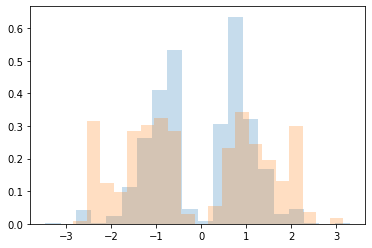

In [11]:
plt.hist(beta_no_snp, density=True, alpha=0.25, bins=20)
plt.hist(beta_snp, density=True, alpha = 0.25, bins=20)

In [12]:
len(beta_no_snp)

24455

(array([0.03961889, 0.06712836, 0.04541036, 0.05418531, 0.00978407,
        0.0079852 , 0.01123193, 0.01425929, 0.00355385, 0.00140399]),
 array([ 2.65048547,  6.57881291, 10.50714034, 14.43546778, 18.36379521,
        22.29212265, 26.22045008, 30.14877752, 34.07710495, 38.00543239,
        41.93375982]),
 <BarContainer object of 10 artists>)

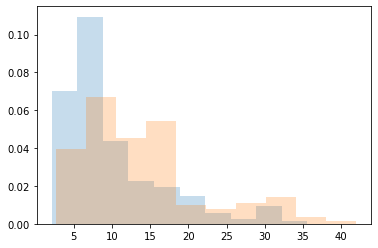

In [13]:
plt.hist(-np.log10(p_no_snp), density=True, alpha=0.25)
plt.hist(-np.log10(p_snp), density=True, alpha = 0.25)

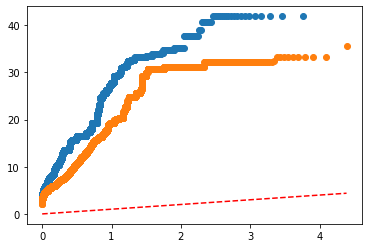

In [14]:
plt.plot(-np.log10((np.arange(len(p_no_snp))+1)/len(p_no_snp))[::-1],
            -np.log10((np.arange(len(p_no_snp))+1)/len(p_no_snp))[::-1], 'r--')

plt.scatter(-np.log10((np.arange(len(p_snp))+1)/len(p_snp))[::-1],
            sorted(-np.log10(p_snp)))
plt.scatter(-np.log10((np.arange(len(p_no_snp))+1)/len(p_no_snp))[::-1],
            sorted(-np.log10(p_no_snp)))

In [6]:
import sys
from Bio import motifs
from Bio.Seq import Seq
import pandas as pd

# I like to script and debug with an interactive interpreter. If using
# interactive interpreter to script quick args with sys.argv, parse_args with
# hardcoded args below
if hasattr(sys, 'ps1'):
    sys.argv = ["", "../../../bjf79/20211209_JingxinRNAseq/code/SplicingAnalysis/leafcutter/JuncfilesMerged.annotated.basic.bed.5ss.tab",
                "../../../bjf79/20211209_JingxinRNAseq/code/SplicingAnalysis/leafcutter/JuncfilesMerged.annotated.basic.bed.5ss.tab.gz"
               ]

_, MyArg1, MyArg2 = sys.argv

df = pd.read_csv(MyArg1, delimiter="\t", names=['name', 'seq'])
df['seq'] = df['seq'].apply(Seq)

m  = motifs.create(df['seq'])
pwm = m.counts.normalize()
pssm = pwm.log_odds()

# pssm.calculate(m.consensus)
df['score'] = df['seq'].apply(pssm.calculate)

#df.to_csv(MyArg2, sep='\t', header=False, index=False)

In [12]:
m

In [1]:
from platform import python_version

In [125]:
snp_x.split(':')

['22', '50526017', 'A', 'T']

In [75]:
def get_splice_junctions(intron):
    chrom, start, end, clu = intron.split(';')[1].split(':')
    strand = clu.split('_')[-1]
    
    return int(start), int(end), strand


def isSNPin5SS(snp, intron):
    
    snp_pos = int(snp.split(':')[1])
    
    start, end, strand = get_splice_junctions(intron)
    
    if strand == '+':
        N1 = start -1
        N2 = start
        G = start + 1
        T = start + 2
        N3 = start + 3
        N4 = start + 4
        N5 = start + 5
        N6 = start + 6
    else:
        N1 = end +1
        N2 = end +0
        G = end -1
        T = end -2
        N3 = end -3
        N4 = end -4
        N5 = end -5
        N6 = end - 6
        
    seq = str(df.loc[intron].seq)
    
    count = 0
    count_err = 0
    if snp_pos == N1:
#         print(intron)
#         print(seq)
        count += 1
        x, count_err = mutate(seq, 0, snp, strand, count_err)
#         print('')
    if snp_pos == N2:
#         print(intron)
#         print(seq)
        count += 1
        x, count_err = mutate(seq, 1, snp, strand, count_err)
#         print('')
    if snp_pos == G:
#         print(intron)
#         print(seq)
        count += 1
        x, count_err = mutate(seq, 2, snp, strand, count_err)
#         print('')
    if snp_pos == T:
#         print(intron)
#         print(seq)
        count += 1
        x, count_err = mutate(seq, 3, snp, strand, count_err)
#         print('')
    if snp_pos == N3:
#         print(intron)
#         print(seq)
        count += 1
        x, count_err = mutate(seq, 4, snp, strand, count_err)
#         print('')
    if snp_pos == N4:
#         print(intron)
#         print(seq)
        count += 1
        x, count_err = mutate(seq, 5, snp, strand, count_err)
#         print('')
    if snp_pos == N5:
#         print(intron)
#         print(seq)
        count += 1
        x, count_err = mutate(seq, 6, snp, strand, count_err)
#         print('')
    if snp_pos == N6:
#         print(intron)
#         print(seq)
        count += 1
        x, count_err = mutate(seq, 7, snp, strand, count_err)
#         print('')

    return count, count_err
        

def mutate(seq, pos, snp, strand, err_count):
    
    chrom, position, original, new = snp.split(':')
    
    if len(original) > 1:
        return 0,0
    
    if strand == '-':
        seq = get_neg_nucleotide(seq)#[::-1]
    
#     if strand == '+':
        
#     print(seq)
#     print(seq[pos])
#     print(pos)
#     print(original)
#     print(snp)
    if not seq[pos] == original:
        err_count += 1
        print(strand)
        print(seq)
        print(pos)
        print(original)
        print(snp)

    nuc = list(seq)
    nuc[pos] = new

    mutated_seq = ''.join(nuc)
        
#     else:
#         print(seq)
#         print(seq[pos])
#         print(pos)
#         print(original)
#         print(get_neg_nucleotide(original))
#         print(snp)
#         if not seq[pos] == get_neg_nucleotide(original):
#             print('warning')
        
#         nuc = list(seq)
#         nuc[pos] = get_neg_nucleotide(original[::-1])
#         mutated_seq = ''.join(nuc)
        
    return mutated_seq, err_count
        
    
def get_neg_nucleotide(S):
    new_S = ''
    for i in range(len(S)):
        N = S[i]
        if N == 'A':
            new_S += 'T'
        elif N == 'T':
            new_S += 'A'
        elif N == 'G':
            new_S += 'C'
        elif N == 'C':
            new_S += 'G'
    return new_S
            



def isClusterinSJ(data, snp_x):
    snp_x_data = data.loc[data.snp_x == snp_x]
    
    token = False
    
    snps_sj_pr = []
    snps_no_sj_pr = []
    betas = []
    p = []
    
    count = 0
    count_err = 0
    
    for idx in snp_x_data.index:
        intron = snp_x_data.loc[idx, 'phenotype_full']
        snp_y = snp_x_data.loc[idx, 'snp_y']
        locus = snp_x_data.loc[idx, 'Locus']
        
        x, y = isSNPin5SS(snp_y, intron)
        
        count += x
        count_err += y
    return count, count_err

merged_splicing = merged_snps.loc[splicing_idx]

count = 0
count_err = 0

for snp_x in tqdm(merged_splicing.snp_x.unique(), leave=True, position=0):
    
    x, y = isClusterinSJ(merged_splicing, snp_x)
    
    count += x
    count_err += y
    

  2%|▏         | 18/727 [00:00<00:04, 166.72it/s]

+
GCCCAGAT
2
G
19:41585872:G:A


  7%|▋         | 49/727 [00:00<00:06, 98.91it/s] 

-
AAGGTCCT
4
C
10:100986746:C:T
-
GAGGTCCT
4
C
10:100986746:C:T
-
AAGGTCAC
4
C
10:100986746:C:T


 10%|█         | 74/727 [00:00<00:08, 80.24it/s]

+
CCTCAGAC
7
A
6:30061395:A:AG
-
AACGTCTT
0
C
16:1772796:C:CACCT
-
AACGTCTT
4
C
16:1772796:C:CACCT
-
GACGTCTG
1
T
1:1231507:T:C


 13%|█▎        | 98/727 [00:01<00:06, 92.48it/s]

-
AAAGTCCG
5
T
20:56388683:T:G
-
GCCGTCGA
6
C
14:24441004:C:A
-
GAGATCGT
5
T
14:24441767:T:G


 17%|█▋        | 127/727 [00:01<00:05, 102.85it/s]

-
GCCGTCGA
5
G
14:24441670:G:A
+
TTACAGAA
1
G
14:96379755:G:A


 23%|██▎       | 164/727 [00:01<00:06, 89.12it/s] 

+
TGTCAGGT
2
G
19:57492212:G:A


 25%|██▌       | 185/727 [00:01<00:05, 91.84it/s]

+
TCACAGGC
4
G
11:33655063:G:A


 31%|███       | 224/727 [00:02<00:06, 79.70it/s]

-
AAAGTCGT
2
C
2:177332141:C:T
+
CTCTAGCA
6
G
1:117060566:G:T
+
TTTCAGGC
0
A
1:99975068:A:G
-
GAGGTCCC
7
G
14:74297633:G:A


 38%|███▊      | 277/727 [00:03<00:04, 109.95it/s]

+
CCCTAGGT
0
G
17:42288996:G:A
+
CTATAGTG
0
G
17:4819581:G:A
-
AAAATCAA
2
C
8:33513081:C:T


 44%|████▍     | 322/727 [00:03<00:03, 130.15it/s]

+
TTCTAGGT
7
C
14:91204873:C:T
+
TCCTAGGC
2
G
11:47237713:G:C
-
TATGTCGG
1
G
18:36781799:G:C


 48%|████▊     | 349/727 [00:03<00:03, 106.03it/s]

+
CTATAGGA
4
T
1:78628396:T:A
+
TTCTAGGA
2
G
2:169584491:G:A
-
GGTGTCTA
0
T
15:74837752:T:C
-
CAGGTCTG
2
C
16:24929612:C:A


 58%|█████▊    | 424/727 [00:04<00:02, 135.31it/s]

-
GACATCTA
6
C
14:77457090:C:G
+
CTTTAGAA
1
G
5:96740783:G:A
+
ATTTAGTG
2
G
8:123142457:G:T


 66%|██████▋   | 483/727 [00:04<00:01, 129.27it/s]

+
TCTCAGGA
2
G
17:44708840:G:T
+
TTTTAGGG
0
G
1:74733530:G:A
+
TCTCAGGT
4
G
2:218697954:G:A


 70%|██████▉   | 508/727 [00:05<00:02, 79.36it/s] 

-
AAAGTCCC
3
A
8:94529074:A:G
+
TTACAGTT
1
G
7:128477173:G:A


 73%|███████▎  | 532/727 [00:05<00:02, 90.08it/s]

-
AAAGTCCT
1
C
18:74260915:C:T
+
TTACAGCC
7
G
1:39026408:G:T


 77%|███████▋  | 563/727 [00:05<00:01, 112.78it/s]

+
TTTAAGAT
0
G
2:63842598:G:A
+
GCGCAGGC
5
A
19:54200892:A:C
+
GCGCAGGC
0
A
19:54200892:A:C
-
AAAATCCA
0
C
10:45672399:C:T


 83%|████████▎ | 601/727 [00:06<00:01, 92.84it/s] 

-
AAGATCCT
7
A
11:796037:A:G


 87%|████████▋ | 630/727 [00:06<00:00, 104.18it/s]

-
AAGGTCGT
6
C
12:132141098:C:T
+
TTTTAGAG
0
G
14:103136303:G:A
+
TCGCAGAC
3
T
6:26370605:T:G
+
TGACAGGT
1
A
2:190195364:A:G
+
TTTAAGGC
4
C
19:37507050:C:A


 92%|█████████▏| 668/727 [00:06<00:00, 140.31it/s]

+
TTACAGCA
2
G
1:207337251:G:A
+
GCACAGAT
2
G
15:30937260:G:A
-
GGGGTCTG
7
A
6:32949265:A:C


 94%|█████████▍| 683/727 [00:06<00:00, 89.28it/s] 

-
GGGGTCCT
4
C
6:31592788:C:T
-
GTGGTCCG
4
C
6:31592788:C:T
-
AAAGTCTA
7
G
12:92432904:G:A
-
GATGTCTA
7
G
12:92432904:G:A


 97%|█████████▋| 705/727 [00:07<00:00, 68.27it/s]

-
AATGTCAA
2
C
17:15999502:C:A


100%|██████████| 727/727 [00:07<00:00, 96.90it/s]

+
TTTCAGGC
0
A
1:99975068:A:G


In [76]:
count

87

In [77]:
count_err

58

In [85]:
df_extended = pd.read_csv('../../hyprcoloc_5ss.extended.sorted.tab', sep='\t', names=['name', 'seq'])

df_extended['seq'] = df_extended['seq'].apply(Seq)

# m  = motifs.create(df_extended['seq'])
# pwm = m.counts.normalize()
# pssm = pwm.log_odds()

# # pssm.calculate(m.consensus)
# df_extended['score'] = df_extended['seq'].apply(pssm.calculate)

In [239]:
df_extended

,name,seq,score
0,polyA.Splicing.Subset_YRI;1:1228946:1231507:cl...,"(A, C, C, G, C, G, T, G, G, A, C, C, C, T, C, ...",4.496214
1,polyA.Splicing.Subset_YRI;1:1228946:1231892:cl...,"(C, C, G, A, G, C, G, C, G, G, G, G, A, G, G, ...",11.314877
2,polyA.Splicing.Subset_YRI;1:1703995:1704223:cl...,"(G, A, G, C, C, A, C, G, C, C, G, G, C, A, T, ...",11.265045
3,polyA.Splicing.Subset_YRI;1:1704146:1704223:cl...,"(G, A, G, C, C, A, C, G, C, C, G, G, C, A, T, ...",11.265045
4,polyA.Splicing.Subset_YRI;1:1721711:1722588:cl...,"(T, T, T, G, T, A, C, T, T, C, C, A, A, A, T, ...",8.836535
...,...,...,...
1895,polyA.Splicing.Subset_YRI;9:133352142:13335244...,"(A, T, C, T, T, C, A, T, T, G, A, T, G, C, C, ...",-0.513433
1896,polyA.Splicing.Subset_YRI;9:136362180:13636348...,"(C, C, A, G, C, T, C, G, T, C, T, A, C, A, C, ...",9.002316
1897,polyA.Splicing.Subset_YRI;9:137111754:13711194...,"(T, C, A, C, T, G, A, C, G, A, G, C, T, C, C, ...",2.439559
1898,polyA.Splicing.Subset_YRI;9:137728529:13774339...,"(G, C, C, A, C, C, A, C, A, A, A, A, T, C, A, ...",7.242187


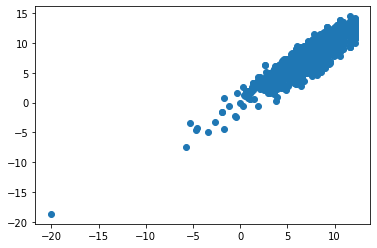

In [46]:
plt.scatter(df.score, df_extended.score)

In [88]:
def get_splice_junctions(intron):
    chrom, start, end, clu = intron.split(';')[1].split(':')
    strand = clu.split('_')[-1]
    
    return int(start), int(end), strand


def isSNPin5SS(snp, intron, mut_diff):
    
    snp_pos = int(snp.split(':')[1])
    
    start, end, strand = get_splice_junctions(intron)
    
    seq = str(df.loc[intron].seq)
    extended_seq = str(df_extended.loc[intron].seq)
    
    for i in range(8):
        if strand == '+':
            test_pos = start + i - 1
        else:
            test_pos = end - i + 1
        
        if snp_pos == test_pos:
            mutated_seq = mutate(seq, extended_seq, i, snp, strand)
            print(snp)
            print(seq)
            print(pssm.calculate(Seq(seq)))
            print(mutated_seq)
            print(pssm.calculate(Seq(mutated_seq)))
            print('')
            
            mut_diff.append(np.max([pssm.calculate(Seq(mutated_seq)), -10]) - pssm.calculate(Seq(seq)))
            
            return mut_diff
    return mut_diff
        

# def mutate(seq, extended_seq, pos, snp, strand):
    
#     chrom, position, original, new = snp.split(':')
    
#     if len(original) > 1:
#         return 0
    
#     if strand == '-':
#         seq = get_neg_nucleotide(seq)
    

#     assert seq[pos] == original:

#     nuc = list(seq)
#     nuc[pos] = new

#     mutated_seq = ''.join(nuc)
        
#     if strand == '-':
#         mutated_seq = get_neg_nucleotide(mutated_seq)
        
#     return mutated_seq
        
    
# def get_neg_nucleotide(S):
#     new_S = ''
#     for i in range(len(S)):
#         N = S[i]
#         if N == 'A':
#             new_S += 'T'
#         elif N == 'T':
#             new_S += 'A'
#         elif N == 'G':
#             new_S += 'C'
#         elif N == 'C':
#             new_S += 'G'
#     return new_S
            



def isClusterinSJ(data, snp_x, mut_diff, beta):
    snp_x_data = data.loc[data.snp_x == snp_x]
    
    token = False
    
    snps_sj_pr = []
    snps_no_sj_pr = []
    betas = []
    p = []
    
    
    
    for idx in snp_x_data.index:
        
        l = len(mut_diff)
        
        intron = snp_x_data.loc[idx, 'phenotype_full']
        snp_y = snp_x_data.loc[idx, 'snp_y']
        locus = snp_x_data.loc[idx, 'Locus']
        
        mut_diff = isSNPin5SS(snp_y, intron, mut_diff)
        
        if l < len(mut_diff):
            beta.append(snp_x_data.loc[idx, 'beta'])
            
    return mut_diff, beta
        
        

merged_splicing = merged_snps.loc[splicing_idx]

mut_diff = []
beta = []

for snp_x in tqdm(merged_splicing.snp_x.unique(), leave=True, position=0):
    
    mut_diff, beta = isClusterinSJ(merged_splicing, snp_x, mut_diff, beta)
    

  4%|▎         | 26/727 [00:00<00:05, 128.58it/s]

11:3361740:T:G
TGGTAATC
4.9489336
TGGTCATC
0.81690526

19:41585872:G:A
AGGTAAGA
10.571796
AGATAAGA
0.68153226

17:51166498:G:A
CGGTAAGG
8.417029
CGATAAGG
-1.4732345

17:51166498:G:A
CGGTAAGG
8.417029
CGATAAGG
-1.4732345



  7%|▋         | 48/727 [00:00<00:09, 68.95it/s] 

4:25160758:G:T
AGGTACGT
9.274116
AGGTACTT
5.9686313

10:100986746:C:T
AGGTGCAA
3.9750698
AGGTACAA
4.5423136

10:100986746:C:T
AGGTGCAA
3.9750698
AGGTACAA
4.5423136

10:100986746:C:T
AGGTGCAA
3.9750698
AGGTACAA
4.5423136



  9%|▉         | 66/727 [00:01<00:15, 41.31it/s]


this will fail
A
A
6:30061395:A:AG
7
6:30061395:A:AG
AGGCAGGA
1.883791
AGGCAGGA
1.883791


this will fail
seriously
C
C
GTCCACGCACG
16:1772796:C:CACCT
GCGTGCAC
-3.3787844
CCGCCCCT
-12.653665


this will fail
seriously
C
C
GTCCACGCACG
16:1772796:C:CACCT
AGGTGCGT
8.706872
CCGCAGGT
-3.9102778



 11%|█▏        | 82/727 [00:01<00:13, 49.16it/s]

1:1231507:T:C
CAGTTAGT
2.6827025
CGGTTAGT
5.9507685



 13%|█▎        | 95/727 [00:01<00:12, 49.81it/s]

20:56388683:T:G
AGGTGACT
7.701
AGGTGCCT
4.8307805



 16%|█▌        | 117/727 [00:02<00:12, 48.25it/s]

14:24441004:C:A
AGGTGAGG
10.289836
AGGTGATG
6.9843516

14:24441767:T:G
AGGTAATC
7.14036
AGGTACTC
4.27014

14:24441768:T:A
AGGTAATC
7.14036
AGGTTATC
3.386843

14:24441670:G:A
AGGTACGC
7.5756245
AGGTATGC
7.838659



 18%|█▊        | 134/727 [00:02<00:10, 57.45it/s]

14:96379755:G:A
AGGTACTG
4.681376
AAGTACTG
1.4133099



 22%|██▏       | 157/727 [00:02<00:11, 48.38it/s]

19:57492212:G:A
AGGTAGTT
6.703899
AGATAGTT
-3.1863654



 24%|██▍       | 173/727 [00:03<00:11, 49.50it/s]

7:43656029:C:T
TGGTAGGG
6.5307016
TGGTAAGG
8.665654

7:43656029:C:T
TGGTAGGG
6.5307016
TGGTAAGG
8.665654

11:33655063:G:A
AAGTGAAG
3.8625064
AAGTAAAG
4.4297504



 25%|██▌       | 185/727 [00:03<00:11, 47.36it/s]


this will fail
TGGGTCAGAC
TGGGTCAGAC
12:6944654:TGGGTCAGAC:T
3
12:6944654:TGGGTCAGAC:T
AGGTGGGT
9.44214
AGGTGCGG
7.419616



 30%|██▉       | 216/727 [00:04<00:11, 45.90it/s]

2:177332141:C:T
CTGTAAGT
6.2033343
CTATAAGT
-3.68693

1:117060566:G:T
AGGTCTGG
4.117866
AGGTCTTG
0.812382



 31%|███       | 227/727 [00:04<00:11, 42.92it/s]

1:99975068:A:G
AAGTAGGT
6.741317
GAGTAGGT
4.4399734

14:74297633:G:A
CCGTGAGC
2.5119925
CCGTGAGT
4.210484

14:73922205:T:C
TGGTAAGA
8.38037
CGGTAAGA
8.131746



 38%|███▊      | 277/727 [00:05<00:05, 79.31it/s]

17:42288996:G:A
GGGTTGGA
2.3819838
AGGTTGGA
4.6833277

17:4819581:G:A
GGGTAGAG
3.2615204
AGGTAGAG
5.562864

14:20345130:G:A
TGGTAGGA
6.245418
TGGTAAGA
8.38037

14:20413368:T:C
AGGTAGGG
8.722128
AGGTGGGG
8.154883

8:33513081:C:T
AGGTACCT
5.398024
AGATACCT
-4.49224



 41%|████▏     | 300/727 [00:05<00:04, 89.27it/s]

1:40041496:A:G
AGGTATGT
9.53715
AGGTGTGT
8.969906

1:40041496:A:G
AGGTATGT
9.53715
AGGTGTGT
8.969906

14:91204873:C:T
GGGTGAGC
7.577256
GGGTGAGT
9.275748



 44%|████▍     | 322/727 [00:05<00:04, 90.54it/s]

14:91170188:C:T
AGGCGGGT
2.889086
AGGTGGGT
9.44214

11:47237713:G:C
AGGTGTGA
7.3973675
AGCTGTGA
-inf

18:36781799:G:C
CCGTAAGT
4.7777276
CGGTAAGT
9.704286


this will fail
seriously
CA
CT
TTTTTCATTCTT
13:52143914:CT:C
AAGTAAGA
7.3037305
ATTTTTTG
-inf


this will fail
seriously
CA
CT
TTTTTCATTCTT
13:52143914:CT:C
AAAGTAAG
-20.089012
ATTTTTGG
-inf



 47%|████▋     | 343/727 [00:05<00:05, 72.05it/s]

1:78628396:T:A
AGGTTTGT
5.783633
AGGTATGT
9.53715

2:169584491:G:A
AGGTAAGT
12.144336
AGATAAGT
2.254071



 50%|████▉     | 360/727 [00:06<00:05, 69.55it/s]

15:74837752:T:C
AGGTCAAG
3.565788
AGGTCAGG
6.7250514

15:74837752:T:C
AGGTGGGC
7.7436476
GGGTGGGC
5.442304

16:24929612:C:A
AGGTCTGT
5.405122
AGTTCTGT
-inf

16:89909088:G:A
AGGTGCGA
7.134333
AGGTGCAA
3.9750698

17:55787659:A:G
CCGTGAAT
1.0512204
CCGTGAGT
4.210484



 55%|█████▍    | 397/727 [00:06<00:03, 91.86it/s]

6:13307592:C:T
AAGTAGGT
6.741317
AAGTAAGT
8.876269

14:77457090:C:G
CAGTAGGT
4.3012667
CAGTAGCT
0.42517546



 59%|█████▉    | 429/727 [00:06<00:03, 94.12it/s]

5:96740783:G:A
CGGTGAGT
9.137041
CAGTGAGT
5.8689756

8:123142457:G:T
AGGTAAAA
7.4125333
AGTTAAAA
-inf



 65%|██████▌   | 476/727 [00:07<00:02, 102.21it/s]

17:44708840:G:T
GGGTACGG
5.6855164
GGTTACGG
-inf

1:74733530:G:A
GGGTGGTC
2.1368198
AGGTGGTC
4.4381638

2:218697954:G:A
AGGTGTCT
5.093815
AGGTATCT
5.661059



 70%|██████▉   | 506/727 [00:08<00:03, 61.21it/s] 

8:94529074:A:G
AGGTGAAG
7.130573
AGGCGAAG
0.57751936

7:128477173:G:A
AGGTGCGC
7.0083804
AAGTGCGC
3.7403145



 72%|███████▏  | 522/727 [00:08<00:03, 53.50it/s]

18:74260915:C:T
CGGTAAGT
9.704286
CAGTAAGT
6.436219

19:52414373:A:G
AGGTGTAT
5.8106427
AGGTGTGT
8.969906

17:5111073:T:A
CTGTATGT
3.5961492
CTGTTTGT
-0.1573676



 75%|███████▍  | 542/727 [00:08<00:02, 69.89it/s]

4:40235364:T:C
AGGTGGGT
9.44214
AGGTGGGC
7.7436476

1:39026408:G:T
AGGTAGGG
8.722128
AGGTAGGT
10.009383

5:131165058:A:C
AGGTGGGT
9.44214
AGGGGGGT
-1.4328421

2:63842598:G:A
GGGTGGGT
7.140795
AGGTGGGT
9.44214

19:54200892:A:C
AGGTGAGG
10.289836
AGGTGCGG
7.419616

19:54200892:A:C
AGGTGCGG
7.419616
CGGTGCGG
4.9795666

10:45672399:C:T
GGGTACGC
5.2742805
AGGTACGC
7.5756245



 81%|████████  | 586/727 [00:09<00:02, 68.03it/s]

8:85219234:A:T
AGGTAAAA
7.4125333
AGGAAAAA
-3.4624484

11:796037:A:G
CGGTGGGT
7.002089
CGGTGGGC
5.303598



 85%|████████▌ | 620/727 [00:09<00:01, 82.41it/s]

14:92121194:A:G
ATGTGCTT
1.9004369
ATGCGCTT
-4.6526165

12:132141098:C:T
CAGTGCGT
2.9987557
CAGTGCAT
-0.16050766

14:103136303:G:A
GGGTCAGA
4.1384244
AGGTCAGA
6.4397683



 89%|████████▊ | 645/727 [00:09<00:00, 88.43it/s]

6:26370605:T:G
AGGTCAGT
8.012307
AGGGCAGT
-2.8626745

2:190195364:A:G
CAGTAAGA
4.8636804
CGGTAAGA
8.131746

19:14594687:G:A
AGGTGAGA
10.004553
AGGTGAAA
6.845289

19:37507050:C:A
CGGTCAAA
0.8404547
CGGTAAAA
4.972483

1:207337251:G:A
ACGTAAGT
7.2177777
ACATAAGT
-2.6724865



 92%|█████████▏| 671/727 [00:10<00:00, 104.28it/s]

15:30937260:G:A
AGGTATGG
8.249894
AGATATGG
-1.6403697

6:32949265:A:C
TGGTATGT
7.345724
TGGTATGG
6.0584683

6:31592788:C:T
TAGTGAGT
6.1175995
TAGTAAGT
6.684843

6:31592788:C:T
TAGTGAGT
6.1175995
TAGTAAGT
6.684843

12:92432904:G:A
CTGTGAGC
3.9375992
CTGTGAGT
5.6360908

12:92432904:G:A
CTGTGAGC
3.9375992
CTGTGAGT
5.6360908



 95%|█████████▌| 692/727 [00:10<00:00, 44.91it/s] 

17:15999502:C:A
AGGTCGTG
1.2846149
AGGTCTTG
0.812382

17:15999502:C:A
TCGTGTGT
1.8519226
TCTTGTGT
-inf

18:63953532:G:A
AGGTACGT
9.274116
AGGTACAT
6.1148524



100%|██████████| 727/727 [00:11<00:00, 62.46it/s]

1:99975068:A:G
AAGTAGGT
6.741317
GAGTAGGT
4.4399734



In [53]:
pssm.calculate(Seq('TAGTAATC'))

ValueError: negative dimensions are not allowed

In [333]:
pssm.calculate(Seq('AGCTGTGA')) < 10

True

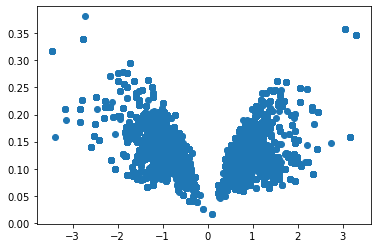

In [315]:
plt.scatter(merged_splicing.beta, merged_splicing.beta_se)

Text(0.5, 1.0, "5'Splice junction SNPs")

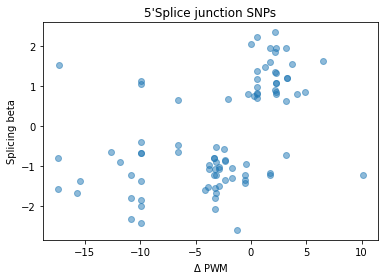

In [58]:
plt.scatter(mut_diff, beta, alpha = 0.5)
plt.xlabel(r'$\Delta$ PWM')
plt.ylabel('Splicing beta')
plt.title("5'Splice junction SNPs")

In [348]:
from scipy.stats import pearsonr, spearmanr

In [349]:
spearmanr(mut_diff, beta)

SpearmanrResult(correlation=0.5725028132546733, pvalue=6.89076385780522e-09)

In [350]:
pearsonr(mut_diff, beta)

(0.47867311729205314, 2.736634385946772e-06)

In [344]:
mut_diff

[-4.132028341293335,
 -9.89026415348053,
 -9.89026391506195,
 -9.89026391506195,
 -3.3054842948913574,
 0.5672438144683838,
 0.5672438144683838,
 0.5672438144683838,
 0.0,
 -9.274880170822144,
 -12.617149829864502,
 3.268065929412842,
 -2.8702197074890137,
 -3.3054842948913574,
 -2.8702197074890137,
 -3.753516912460327,
 0.2630343437194824,
 -3.2680660486221313,
 -9.89026427268982,
 2.1349525451660156,
 2.1349525451660156,
 0.5672440528869629,
 -2.0225234031677246,
 -9.89026427268982,
 -3.3054840564727783,
 -2.3013434410095215,
 1.6984915733337402,
 -0.24862384796142578,
 2.3013439178466797,
 2.3013434410095215,
 2.1349520683288574,
 -0.5672445297241211,
 -9.89026403427124,
 -0.5672445297241211,
 -0.5672445297241211,
 1.6984920501708984,
 6.553053617477417,
 -inf,
 4.926558017730713,
 -inf,
 -inf,
 3.7535171508789062,
 -9.890264749526978,
 3.1592633724212646,
 -2.3013434410095215,
 -inf,
 -3.1592633724212646,
 3.1592636108398438,
 2.1349525451660156,
 -3.8760912120342255,
 -3.268065452

In [87]:
def mutate(seq, extended_seq, pos, snp, strand):
    
    chrom, position, original, new = snp.split(':')
    
    if strand == '-':
        seq = get_neg_nucleotide(seq)
        extended_seq = get_neg_nucleotide(extended_seq)
    
    if (len(original) == 1) and (len(new)==1):
    
        assert seq[pos] == original

        nuc = list(seq)
        nuc[pos] = new

        mutated_seq = ''.join(nuc)

        if strand == '-':
            mutated_seq = get_neg_nucleotide(mutated_seq)

        return mutated_seq
    
    else:#if (len(original) > 1) and (len(new)==1):
        
#         print('')
#         print('this might fail')
#         print(seq[pos:(pos+len(original))])
#         print(original)
        
#         assert seq[pos:(pos+len(original))] == original
        print('')
        print('this will fail')
        
        if strand == '+':
            print(extended_seq[(pos+20):(pos+len(original)+20)])
            print(original)
            assert extended_seq[(pos+20):(pos+len(original)+20)] == original
            
            seq5 = extended_seq[:(pos+20)]
            seq3 = extended_seq[(pos+len(original)+20):]

            mutated_seq = seq5 + new + seq3
            print(snp)
            print(pos)
            mutated_seq = mutated_seq[20:28]
            
        else:
            print('seriously')
            print(extended_seq[(pos+20):(pos+len(original)+20)])
            print(original)
            print(extended_seq[(pos+15):(pos+len(original)+25)])
            assert extended_seq[(pos+21-len(original)):(pos+21)][::-1] == original
            
            seq5 = extended_seq[:(pos+21)][::-1]
            seq3 = extended_seq[(pos+21-len(original)):][::-1]
            
            mutated_seq = seq5 + new + seq3
            mutated_seq = get_neg_nucleotide(mutated_seq)[::-1][20:28]
        
        return mutated_seq
        
        
    
def get_neg_nucleotide(S):
    new_S = ''
    for i in range(len(S)):
        N = S[i]
        if N == 'A':
            new_S += 'T'
        elif N == 'T':
            new_S += 'A'
        elif N == 'G':
            new_S += 'C'
        elif N == 'C':
            new_S += 'G'
    return new_S#[::-1]
        

In [79]:
'ATGC'[:2]

'AT'

In [272]:
'ATGC'[3:]

'C'

In [ ]:
seq = str(df.loc[intron].seq)
    extended_seq = str(df_extended.loc[intron].seq)

In [244]:
merged_snps

,snp_x,beta,beta_se,p,Locus,phenotype_full,iteration,ColocPr,RegionalPr,TopSNPFinemapPr,snp_y,ColocalizedCluster,FinemapPr
0,1:169950692:C:T,0.707955,0.109608,1.735140e-08,ENSG00000000457.14,MetabolicLabelled.30min;ENSG00000000457.14,1,0.8375,0.9621,0.4808,1:169950692:C:T,1,0.480820
1,1:169950692:C:T,0.707955,0.109608,1.735140e-08,ENSG00000000457.14,MetabolicLabelled.30min;ENSG00000000457.14,1,0.8375,0.9621,0.4808,1:169951871:ATAAT:A,1,0.480820
2,1:169950692:C:T,0.580269,0.114196,3.588590e-06,ENSG00000000457.14,MetabolicLabelled.60min;ENSG00000000457.14,1,0.8375,0.9621,0.4808,1:169950692:C:T,1,0.480820
3,1:169950692:C:T,0.580269,0.114196,3.588590e-06,ENSG00000000457.14,MetabolicLabelled.60min;ENSG00000000457.14,1,0.8375,0.9621,0.4808,1:169951871:ATAAT:A,1,0.480820
4,1:169692248:T:TA,-0.548874,0.087977,2.952800e-08,ENSG00000000460.17,H3K27AC;H3K27AC_peak_7161,1,0.3770,0.6895,0.2401,1:169692248:T:TA,1,0.240080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321739,11:57646470:C:G,1.013670,0.136558,2.102900e-10,ENSG00000288534.1,H3K27AC;H3K27AC_peak_16841,1,0.9258,0.9997,0.5275,11:57651876:G:T,1,0.472271
321740,11:57646470:C:G,1.058860,0.131536,1.478100e-11,ENSG00000288534.1,H3K27AC;H3K27AC_peak_16842,1,0.9258,0.9997,0.5275,11:57646470:C:G,1,0.527473
321741,11:57646470:C:G,1.058860,0.131536,1.478100e-11,ENSG00000288534.1,H3K27AC;H3K27AC_peak_16842,1,0.9258,0.9997,0.5275,11:57651876:G:T,1,0.472271
321742,11:57646470:C:G,0.770294,0.121887,2.117410e-08,ENSG00000288534.1,H3K4ME3;H3K4ME3_peak_9500,1,0.9258,0.9997,0.5275,11:57646470:C:G,1,0.527473


In [62]:
df = pd.read_csv('../../hyprcoloc_3ss.sorted.tab', sep='\t', names=['name', 'seq'])

df['seq'] = df['seq'].apply(Seq)

m  = motifs.create(df['seq'])
pwm = m.counts.normalize()
pssm = pwm.log_odds()

# pssm.calculate(m.consensus)
df['score'] = df['seq'].apply(pssm.calculate)

df_extended = pd.read_csv('../../hyprcoloc_3ss.extended.sorted.tab', sep='\t', names=['name', 'seq'])

df_extended['seq'] = df_extended['seq'].apply(Seq)

# m  = motifs.create(df_extended['seq'])
# pwm = m.counts.normalize()
# pssm = pwm.log_odds()

# # pssm.calculate(m.consensus)
# df_extended['score'] = df_extended['seq'].apply(pssm.calculate)

In [86]:
df.index = [df.name[i].split('::')[0] for i in range(len(df.name))]
df_extended.index = [df_extended.name[i].split('::')[0] for i in range(len(df_extended.name))]

In [98]:
def mutate(seq, extended_seq, pos, snp, strand):
    
    chrom, position, original, new = snp.split(':')
    
    if strand == '-':
        seq = get_neg_nucleotide(seq)
        extended_seq = get_neg_nucleotide(extended_seq)
    
    if (len(original) == 1) and (len(new)==1):
        
        print(strand)
    
        print(seq[pos])
        print(original)
        print(seq)
        print(pos)
        assert seq[pos] == original

        nuc = list(seq)
        nuc[pos] = new

        mutated_seq = ''.join(nuc)

        if strand == '-':
            mutated_seq = get_neg_nucleotide(mutated_seq)

        return mutated_seq
    
    else:#if (len(original) > 1) and (len(new)==1):
        
#         print('')
#         print('this might fail')
#         print(seq[pos:(pos+len(original))])
#         print(original)
        
#         assert seq[pos:(pos+len(original))] == original
        print('')
        print('this will fail')
        
        if strand == '+':
            print(extended_seq[(pos+20):(pos+len(original)+20)])
            print(original)
            assert extended_seq[(pos+20):(pos+len(original)+20)] == original
            
            seq5 = extended_seq[:(pos+20)]
            seq3 = extended_seq[(pos+len(original)+20):]

            mutated_seq = seq5 + new + seq3
            print(snp)
            print(pos)
            mutated_seq = mutated_seq[20:28]
            
        else:
            print('seriously')
            print(extended_seq[(pos+20):(pos+len(original)+20)])
            print(original)
            print(extended_seq[(pos+15):(pos+len(original)+25)])
            assert extended_seq[(pos+21-len(original)):(pos+21)][::-1] == original
            
            seq5 = extended_seq[:(pos+21)][::-1]
            seq3 = extended_seq[(pos+21-len(original)):][::-1]
            
            mutated_seq = seq5 + new + seq3
            mutated_seq = get_neg_nucleotide(mutated_seq)[::-1][20:28]
        
        return mutated_seq
        
        
    
def get_neg_nucleotide(S):
    new_S = ''
    for i in range(len(S)):
        N = S[i]
        if N == 'A':
            new_S += 'T'
        elif N == 'T':
            new_S += 'A'
        elif N == 'G':
            new_S += 'C'
        elif N == 'C':
            new_S += 'G'
    return new_S#[::-1]
        

In [99]:
merged_snps = colocalized.merge(snps, left_on='Locus', right_on='Locus')

splicing_idx = merged_snps.loc[[y == 'polyA.Splicing.Subset_YRI' for y in [x.split(';')[0] for x in merged_snps.phenotype_full]]].index

In [100]:
def get_splice_junctions(intron):
    chrom, start, end, clu = intron.split(';')[1].split(':')
    strand = clu.split('_')[-1]
    
    return int(start), int(end), strand


def isSNPin3SS(snp, intron, mut_diff):
    
    snp_pos = int(snp.split(':')[1])
    
    start, end, strand = get_splice_junctions(intron)
    
    seq = str(df.loc[intron].seq)
    extended_seq = str(df_extended.loc[intron].seq)
    
    for i in range(8):
        if strand == '+':
            test_pos = end + i - 5
        else:
            test_pos = start - i + 5
        
        if snp_pos == test_pos:
            mutated_seq = mutate(seq, extended_seq, i, snp, strand)
            print(snp)
            print(seq)
            print(pssm.calculate(Seq(seq)))
            print(mutated_seq)
            print(pssm.calculate(Seq(mutated_seq)))
            print('')
            
            mut_diff.append(np.max([pssm.calculate(Seq(mutated_seq)), -10]) - pssm.calculate(Seq(seq)))
            
            return mut_diff
    return mut_diff
        

def isClusterinSJ(data, snp_x, mut_diff, beta):
    snp_x_data = data.loc[data.snp_x == snp_x]
    
    token = False
    
    snps_sj_pr = []
    snps_no_sj_pr = []
    betas = []
    p = []
    
    
    
    for idx in snp_x_data.index:
        
        l = len(mut_diff)
        
        intron = snp_x_data.loc[idx, 'phenotype_full']
        snp_y = snp_x_data.loc[idx, 'snp_y']
        locus = snp_x_data.loc[idx, 'Locus']
        
        mut_diff = isSNPin3SS(snp_y, intron, mut_diff)
        
        if l < len(mut_diff):
            beta.append(snp_x_data.loc[idx, 'beta'])
            
    return mut_diff, beta
        
        

merged_splicing = merged_snps.loc[splicing_idx]

mut_diff = []
beta = []

for snp_x in tqdm(merged_splicing.snp_x.unique(), leave=True, position=0):
    
    mut_diff, beta = isClusterinSJ(merged_splicing, snp_x, mut_diff, beta)
    

  1%|          | 5/727 [00:00<00:06, 110.60it/s]

+
G
G
GGGTGAGT
4
2:201141373:G:A
GGGTGAGT
9.275748
GGGTAAGT
9.842992

+
A
C
CGGTAAGA
5


AssertionError: 

In [70]:
df_extended.iloc[0].seq

Seq('AATGATGTGTCTGTGTCTCTCTGCAGACTGTGAGCTGCTTGTCCCCAT')

In [71]:
df.iloc[0].seq

Seq('CTGCAGAC')

In [74]:
df_extended.iloc[0].seq[20:28]

Seq('CTGCAGAC')

In [97]:
df

,name,seq,score
polyA.Splicing.Subset_YRI;1:1228946:1231507:clu_43_-,polyA.Splicing.Subset_YRI;1:1228946:1231507:cl...,"(C, A, G, T, T, A, G, T)",2.682703
polyA.Splicing.Subset_YRI;1:1228946:1231892:clu_43_-,polyA.Splicing.Subset_YRI;1:1228946:1231892:cl...,"(C, G, G, T, G, A, G, T)",9.137041
polyA.Splicing.Subset_YRI;1:1703995:1704223:clu_79_-,polyA.Splicing.Subset_YRI;1:1703995:1704223:cl...,"(A, G, G, T, G, A, G, C)",9.878600
polyA.Splicing.Subset_YRI;1:1704146:1704223:clu_79_-,polyA.Splicing.Subset_YRI;1:1704146:1704223:cl...,"(A, G, G, T, G, A, G, C)",9.878600
polyA.Splicing.Subset_YRI;1:1721711:1722588:clu_88_-,polyA.Splicing.Subset_YRI;1:1721711:1722588:cl...,"(A, G, G, T, G, A, G, C)",9.878600
...,...,...,...
polyA.Splicing.Subset_YRI;9:133352142:133352446:clu_19870_-,polyA.Splicing.Subset_YRI;9:133352142:13335244...,"(C, C, G, T, A, C, G, T)",1.907508
polyA.Splicing.Subset_YRI;9:136362180:136363487:clu_19904_-,polyA.Splicing.Subset_YRI;9:136362180:13636348...,"(A, G, G, T, A, G, G, C)",8.310891
polyA.Splicing.Subset_YRI;9:137111754:137111941:clu_19966_-,polyA.Splicing.Subset_YRI;9:137111754:13711194...,"(C, G, G, T, A, C, T, G)",2.241326
polyA.Splicing.Subset_YRI;9:137728529:137743392:clu_20888_+,polyA.Splicing.Subset_YRI;9:137728529:13774339...,"(A, G, G, T, A, A, A, G)",7.697816
